<a href="https://colab.research.google.com/github/hazim17/Portofolio_DA/blob/main/Project_Hotel_Revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this project, I want to make a data processing & query using SQLite  then data visualization using Tableau

I get the dataset from:  https://www.absentdata.com/hotel_revenue_historical_full/

## The question I should answer:
- Is our hotel revenue growing by year?
we have two hotel types so it would be good to segment revenue by hotel type

- Should We increase our parking lot size?
We want to understand if there is a trend in guests with personal cars



## What I'm gonna do

1. Build a database using SQLite
2. Develop the SQL query, answer the question
3. Create a visualization using Tableau public (Dashboard and Summarize Finding)

Tableau public link: https://public.tableau.com/views/HotelRevenue_16339695420080/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [ ]:
# import libraries

import numpy as np 
import pandas as pd 
import sqlite3

In [ ]:
import sqlite3

# define connection and cursor
# conenction is used to connect with database
database = '/content/drive/MyDrive/data_anal_project/Hotel_revenue/hotel.db'
connection = sqlite3.connect(database)

# cursor is used to interact with database through sql command
cursor = connection.cursor()

In [ ]:
# read excel file
path = '/content/drive/MyDrive/data_anal_project/Hotel_revenue/hotel_revenue_historical_full.xlsx'
xls = pd.ExcelFile(path)

In [ ]:
# read each sheets
df_2018 = pd.read_excel(xls, '2018')
df_2019 = pd.read_excel(xls, '2019')
df_2020 = pd.read_excel(xls, '2020')
df_meal_cost = pd.read_excel(xls, 'meal_cost')
df_market_segment = pd.read_excel(xls, 'market_segment')

In [ ]:
df_meal_cost.head()

,Cost,meal
0,0.00,Undefined
1,12.99,BB
2,17.99,HB
3,21.99,FB
4,35.00,SC


In [ ]:
# import data from excel to sql
df_2018.to_sql('year2018', connection, if_exists='replace', index=False)
df_2019.to_sql('year2019', connection, if_exists='replace', index=False)
df_2020.to_sql('year2020', connection, if_exists='replace', index=False)
df_meal_cost.to_sql('meal_cost', connection, if_exists='replace', index=False)
df_market_segment.to_sql('market_segment', connection, if_exists='replace', index=False)

In [ ]:
# look at one of our table
command1 = '''
        SELECT * 
        FROM year2018 
        LIMIT 5
        '''
pd.read_sql(command1, connection)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,None,0,Transient,82.0,0,1,Canceled,2018-05-06 00:00:00
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,None,0,Transient,105.5,0,0,Canceled,2018-04-22 00:00:00
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,None,0,Transient,123.0,0,0,Canceled,2018-06-23 00:00:00
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,None,0,Transient,107.0,0,2,Canceled,2018-05-11 00:00:00
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,None,0,Transient,108.3,0,2,Canceled,2018-05-29 00:00:00


In [ ]:
# We union all the 3 tables that we have: year2018, year2019, year2020
command2 = '''
          WITH hotels AS (
            SELECT * FROM year2018
            UNION
            SELECT * FROM year2019
            UNION
            SELECT * FROM year2020
          )

          SELECT * FROM hotels
          '''

pd.read_sql(command2, connection).head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,0,0,2018,August,31,1,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2018-08-02 00:00:00
1,City Hotel,0,0,2018,August,32,3,1,0,2,0.0,0,BB,PRT,Complementary,Direct,0,0,0,A,D,0,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2018-08-04 00:00:00
2,City Hotel,0,0,2018,August,32,3,1,0,2,0.0,0,BB,PRT,Complementary,Direct,0,0,0,D,D,0,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2018-08-04 00:00:00
3,City Hotel,0,0,2018,August,32,3,1,2,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,40.0,0,Group,65.0,0,0,Check-Out,2018-08-06 00:00:00
4,City Hotel,0,0,2018,August,32,4,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,90.0,0,0,Check-Out,2018-08-05 00:00:00


# Answer The Question





## Is our hotel revenue growing by year?

we have two hotel types so it would be good to segment revenue by hotel type

In [ ]:
# take revenue, hotel type and year arrival
command3 = '''
          WITH hotels AS (
            SELECT * FROM year2018
            UNION
            SELECT * FROM year2019
            UNION
            SELECT * FROM year2020
          )

          -- Create/select the the revenue and arrival_date =_year
          -- adr is daily rate
          -- then groupby it
          SELECT 
            hotel AS Hotel_type,
            arrival_date_year,
            ROUND(SUM((stays_in_weekend_nights+stays_in_week_nights)*adr), 2)	AS Revenue
          FROM hotels
          GROUP BY arrival_date_year, Hotel_type
          '''

revenue = pd.read_sql(command3, connection)
revenue

,Hotel_type,arrival_date_year,Revenue
0,City Hotel,2018,1764667.57
1,Resort Hotel,2018,3120849.49
2,City Hotel,2019,10755979.11
3,Resort Hotel,2019,9432430.29
4,City Hotel,2020,8018122.43
5,Resort Hotel,2020,6266123.81


In [ ]:
# make dataframe from sql
df_1 = pd.DataFrame(revenue, columns=['Hotel_type','arrival_date_year','Revenue'])
print(df)

     Hotel_type  arrival_date_year      Revenue
0    City Hotel               2018   1764667.57
1  Resort Hotel               2018   3120849.49
2    City Hotel               2019  10755979.11
3  Resort Hotel               2019   9432430.29
4    City Hotel               2020   8018122.43
5  Resort Hotel               2020   6266123.81


In [ ]:
print(df_1[df_1['Hotel_type'] == 'City Hotel'])

   Hotel_type  arrival_date_year      Revenue
0  City Hotel               2018   1764667.57
2  City Hotel               2019  10755979.11
4  City Hotel               2020   8018122.43


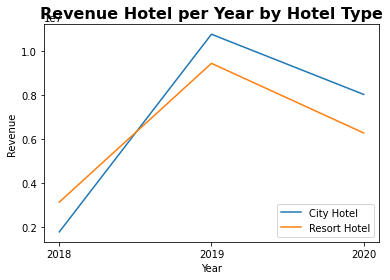

In [ ]:
# Create visualization
import matplotlib.pyplot as plt

plt.clf()

plt.plot(df_1[df_1['Hotel_type'] == 'City Hotel'].arrival_date_year, 
         df_1[df_1['Hotel_type'] == 'City Hotel'].Revenue,
         label="City Hotel")
plt.plot(df_1[df_1['Hotel_type'] == 'Resort Hotel'].arrival_date_year,
         df_1[df_1['Hotel_type'] == 'Resort Hotel'].Revenue, 
         label="Resort Hotel")

# Add legend
plt.legend(loc='lower right')

# Add title and x, y labels
# fig, ax = plt.subplots()
# ax.set_xticks([2018, 2019, 2020])
# ax.set_xticklabels(['2018', '2019', '2020'])

plt.title("Revenue Hotel per Year by Hotel Type", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.xticks([2018, 2019, 2020])

plt.show()

- The hotel Revenue increased from 2018 to 2019, but due to coronavirus, the revenue of the hotel in 2020 decreased

- This graph is not complete, because we haven't calculate the discount in the revenue, the rest of the question will be answered in Tableau

## Continue the query, Join the hotels with market_segment and meal_cost tables; this query id For Tableau

In [ ]:
pd.read_sql("SELECT * FROM market_segment", connection).head()

,Discount,market_segment
0,0.00,Undefined
1,0.10,Direct
2,0.10,Groups
3,0.15,Corporate
4,0.20,Aviation


In [ ]:
pd.read_sql("SELECT * FROM meal_cost", connection).head()

,Cost,meal
0,0.00,Undefined
1,12.99,BB
2,17.99,HB
3,21.99,FB
4,35.00,SC


In [ ]:
# take revenue, hotel type and year arrival
command4 = '''
          WITH hotels AS (
            SELECT * FROM year2018
            UNION
            SELECT * FROM year2019
            UNION
            SELECT * FROM year2020
          )

          SELECT * FROM hotels
          LEFT JOIN market_segment
          ON hotels.market_segment = market_segment.market_segment
          LEFT JOIN meal_cost
          ON meal_cost.meal = hotels.meal
            
          '''

data_fix = pd.read_sql(command4, connection)
data_fix.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,market_segment,Cost,meal
0,City Hotel,0,0,2018,August,31,1,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2018-08-02 00:00:00,0.10,Direct,12.99,BB
1,City Hotel,0,0,2018,August,32,3,1,0,2,0.0,0,BB,PRT,Complementary,Direct,0,0,0,A,D,0,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2018-08-04 00:00:00,1.00,Complementary,12.99,BB
2,City Hotel,0,0,2018,August,32,3,1,0,2,0.0,0,BB,PRT,Complementary,Direct,0,0,0,D,D,0,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2018-08-04 00:00:00,1.00,Complementary,12.99,BB
3,City Hotel,0,0,2018,August,32,3,1,2,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,40.0,0,Group,65.0,0,0,Check-Out,2018-08-06 00:00:00,0.15,Corporate,12.99,BB
4,City Hotel,0,0,2018,August,32,4,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,90.0,0,0,Check-Out,2018-08-05 00:00:00,0.30,Online TA,12.99,BB


In [ ]:
data_fix.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Discount',
       'market_segment', 'Cost', 'meal'],
      dtype='object')

In [ ]:
# Export this data to csv
data_fix.to_csv(r'/content/drive/MyDrive/data_anal_project/Hotel_revenue/data_fix.csv', 
                index = False, 
                header=True)

In [ ]:
# conn.commit used to confirm any changes you make
connection.commit()

# conn.close used to close the connection you make
connection.close()